In [372]:
from nufeb_tools import utils,plot
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [37]:
x = utils.get_data(test=True)


In [38]:
x.directory

'C:\\Users\\Jonathan\\.nufeb_tools\\data\\Run_26_90_83_1'

In [39]:
x.h5

<HDF5 file "trajectory.h5" (mode r)>

In [40]:
def test(directory=None,id=None,test=True,timestep=10):
    if directory:
        print('there is a dir')
    elif not directory and id is not None:
        print('no directory, but got an id')
test(id='test')

no directory, but got an id


In [41]:
""" light = 1.00e-01 #kg/m^3
co2 = 4e-1
mu_max = 0.047*24 #2.25e-05# 1/d
K_m_light = 3.5e-04
K_m_co2 = 5e-2
def monod_func(y,t):
    return y*mu_max * (light/(K_m_light + light)) * (co2/( K_m_co2 + co2))
t = np.linspace(df.index[0], df.index[-1],1000)
sol = odeint(monod_func, y0, t)
f, ax = plt.subplots(figsize=(9,6))
ax.plot(df.iloc[:,1],label=f'Data')
ax.plot(t,sol,ls='--',label=f'fit') """

" light = 1.00e-01 #kg/m^3\nco2 = 4e-1\nmu_max = 0.047*24 #2.25e-05# 1/d\nK_m_light = 3.5e-04\nK_m_co2 = 5e-2\ndef monod_func(y,t):\n    return y*mu_max * (light/(K_m_light + light)) * (co2/( K_m_co2 + co2))\nt = np.linspace(df.index[0], df.index[-1],1000)\nsol = odeint(monod_func, y0, t)\nf, ax = plt.subplots(figsize=(9,6))\nax.plot(df.iloc[:,1],label=f'Data')\nax.plot(t,sol,ls='--',label=f'fit') "

In [42]:
x.single_cell_growth()

In [43]:
x.single_cell_biomass

,id,type,time,biomass
0,95,2,0.000000,92.505631
1,95,2,0.277778,90.662882
2,95,2,0.555556,88.941568
3,95,2,0.833333,87.342844
4,95,2,1.111111,85.860407
...,...,...,...,...
11711,79,2,26.666667,132.590902
11712,79,2,26.944444,136.687773
11713,79,2,27.222222,140.810091
11714,79,2,27.500000,67.292851


In [44]:
x1 = x.h5['x']['0']
x1.__array__(x1.dtype)

array([2.59e-05, 2.45e-05, 4.24e-05, 2.68e-05, 3.47e-05, 3.77e-05,
       2.12e-05, 3.95e-05, 4.21e-05, 2.59e-05, 4.26e-05, 3.28e-05,
       2.01e-05, 3.22e-05, 6.53e-06, 1.58e-05, 2.52e-05, 3.97e-05,
       3.53e-05, 4.08e-05, 7.88e-06, 4.95e-05, 2.24e-05, 1.73e-05,
       3.42e-05, 2.22e-05, 3.17e-05, 1.18e-06, 2.48e-05, 4.10e-05,
       3.77e-05, 2.83e-05, 5.81e-06, 3.08e-05, 2.02e-05, 4.53e-05,
       1.74e-05, 3.38e-05, 4.48e-05, 4.84e-05, 2.24e-05, 5.20e-06,
       4.45e-05, 2.31e-05, 1.86e-05, 4.97e-05, 2.94e-05, 1.56e-05,
       4.34e-05, 2.58e-05, 3.42e-05, 1.63e-05, 6.99e-05, 7.24e-05,
       9.18e-05, 6.52e-05, 6.39e-05, 9.63e-05, 7.82e-05, 9.43e-05,
       7.29e-05, 8.88e-05, 8.02e-05, 9.45e-05, 6.07e-05, 9.80e-05,
       6.24e-05, 5.34e-05, 9.87e-05, 5.73e-05, 6.97e-05, 9.77e-05,
       6.33e-05, 5.46e-05, 5.34e-05, 7.45e-05, 9.77e-05, 6.61e-05,
       7.81e-05, 5.37e-05, 9.70e-05, 5.58e-05, 6.33e-05, 7.36e-05,
       6.85e-05, 7.34e-05, 6.60e-05, 7.51e-05, 8.94e-05, 8.30e

In [45]:
def radius_key(timestep):
    """
    Generate the appropriate key for a radius at a given timestep.
    Does not check timestep for validity.
    This function exists because current phototroph runs use an older version
    of NUFEB which output individual radius keys for each timestep, (e.g.
    radius0, radius100, etc) rather than a single radius entry indexed by
    timestep.
    Parameters
    ----------
    timestep : The numeric time step at which we want radius info
    Returns
    -------
    A string representing the key for the radius information at the given
    timestep
    """
    return(f'radius{timestep}')

    #return( ret_array[ret_array[:,0]!= 0])

In [46]:
trajectory = x.h5
time = str(0)
def get_positions(trajectory,time):

        return pd.concat([pd.Series(trajectory['id'][time],name='ID'),
        pd.Series(trajectory['x'][time],name='x'),
        pd.Series(trajectory['y'][time],name='y'),
        pd.Series(trajectory['z'][time],name='z')],axis=1)
ret_array = get_positions(trajectory,time)

In [47]:
ret_array.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
      dtype=int64)

In [48]:
comb = combinations(ret_array.index.values, 2)

In [49]:
for i in list(comb):
    print (i[0],i[1])

 74
36 75
36 76
36 77
36 78
36 79
36 80
36 81
36 82
36 83
36 84
36 85
36 86
36 87
36 88
36 89
36 90
36 91
36 92
36 93
36 94
36 95
36 96
36 97
36 98
36 99
36 100
36 101
36 102
36 103
36 104
36 105
36 106
36 107
36 108
36 109
36 110
36 111
36 112
36 113
36 114
36 115
37 38
37 39
37 40
37 41
37 42
37 43
37 44
37 45
37 46
37 47
37 48
37 49
37 50
37 51
37 52
37 53
37 54
37 55
37 56
37 57
37 58
37 59
37 60
37 61
37 62
37 63
37 64
37 65
37 66
37 67
37 68
37 69
37 70
37 71
37 72
37 73
37 74
37 75
37 76
37 77
37 78
37 79
37 80
37 81
37 82
37 83
37 84
37 85
37 86
37 87
37 88
37 89
37 90
37 91
37 92
37 93
37 94
37 95
37 96
37 97
37 98
37 99
37 100
37 101
37 102
37 103
37 104
37 105
37 106
37 107
37 108
37 109
37 110
37 111
37 112
37 113
37 114
37 115
38 39
38 40
38 41
38 42
38 43
38 44
38 45
38 46
38 47
38 48
38 49
38 50
38 51
38 52
38 53
38 54
38 55
38 56
38 57
38 58
38 59
38 60
38 61
38 62
38 63
38 64
38 65
38 66
38 67
38 68
38 69
38 70
38 71
38 72
38 73
38 74
38 75
38 76
38 77
38 78
38 79
38 8

In [50]:
def get_dist(ret_array):
    comb = combinations(ret_array.index.values, 2)
    distance = []
    id_set = []
    for i in list(comb):
        dx = (ret_array.x[i[0]] - ret_array.x[i[1]])**2
        dy = (ret_array.y[i[0]] - ret_array.y[i[1]])**2
        dz = (ret_array.z[i[0]] - ret_array.z[i[1]])**2
        distance.append(np.sqrt(dx+dy+dz))
        id_set.append((ret_array.ID[i[0]],ret_array.ID[i[1]]))
    return distance, id_set

In [51]:
distance, id_set = get_dist(ret_array)

In [52]:
distance.sort()

In [53]:
num_neighbors = 3
neighbors = list()
for i in range(num_neighbors):
    neighbors.append(distance[i])

In [54]:
neighbors

[2.3374344910606604e-06, 2.6687450234145675e-06, 3.1960913628993775e-06]

In [55]:
ret_array.ID.unique()

array([ 95,  53,  62,  45,  26,  47,  49,  37, 105,  68,  84,  10,  67,
        76, 116,  83, 111,  23,  64, 109,  51,   4,  16,  63,  78,  20,
        24,  29,  48,  91, 102,  36, 108,  22,  27,  30,  92,  38,  43,
        12,   8,   6,  17,  74,  19,  77,  21,  44,   5,  69,  86,  59,
        42,  13,  56,  65,  75,  71,  14, 103,   9,  18,  60,  58,  72,
        66,  87,  39,  93,  70, 106, 114,  97,  15,  85,  96,  52,  35,
       100,  80,  25, 112,  40,  73,  98, 101,  11,  61,  41,  88,  32,
        34, 115, 104, 107,  82,  50,  55,  57,  54,  31,   7,  99,  81,
         2,  46,  33,  90, 113,  28,  94,   3, 110,   1,  89,  79])

In [56]:
def get_dist(df):
    distance = []
    id_set = []
    for i in list(comb):
        dx = (ret_array.x[i[0]] - ret_array.x[i[1]])**2
        dy = (ret_array.y[i[0]] - ret_array.y[i[1]])**2
        dz = (ret_array.z[i[0]] - ret_array.z[i[1]])**2
        distance.append(np.sqrt(dx+dy+dz))
        id_set.append((ret_array.ID[i[0]],ret_array.ID[i[1]]))
    return distance, id_set
for i in ret_array.index.values:
    

IndentationError: expected an indented block (<ipython-input-56-0a11ed8a35f6>, line 12)

In [20]:
ret_array.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
      dtype=int64)

In [23]:
ret_array[ret_array.index !=0]

,ID,x,y,z
1,53,0.000024,0.000004,0.000003
2,62,0.000042,0.000006,0.000003
3,45,0.000027,0.000016,0.000003
4,26,0.000035,0.000003,0.000004
5,47,0.000038,0.000023,0.000004
...,...,...,...,...
111,3,0.000096,0.000088,0.000006
112,110,0.000094,0.000093,0.000007
113,1,0.000053,0.000096,0.000008
114,89,0.000079,0.000090,0.000008


In [37]:
temp = (ret_array.loc[0][['x','y','z']] - ret_array.loc[ret_array.index !=0][['x','y','z']])**2


In [41]:
np.sqrt(temp.x + temp.y + temp.z)

1      0.000016
2      0.000022
3      0.000005
4      0.000020
5      0.000012
         ...   
111    0.000098
112    0.000100
113    0.000081
114    0.000088
115    0.000086
Length: 115, dtype: float64

In [34]:
ret_array.loc[0][['x','y','z']]

x    0.000026
y    0.000020
z    0.000001
Name: 0, dtype: float64

In [36]:
ret_array.loc[ret_array.index.values != 0][['x','y','z']]

,x,y,z
1,0.000024,0.000004,0.000003
2,0.000042,0.000006,0.000003
3,0.000027,0.000016,0.000003
4,0.000035,0.000003,0.000004
5,0.000038,0.000023,0.000004
...,...,...,...
111,0.000096,0.000088,0.000006
112,0.000094,0.000093,0.000007
113,0.000053,0.000096,0.000008
114,0.000079,0.000090,0.000008


In [57]:
trajectory['concentration']['suc']['0']

<HDF5 dataset "0": shape (5, 50, 50), type "<f8">

In [58]:
x.dims

(5, 50, 50)

In [60]:
CellInfo = {'cyano': {'GrowthRate' : round(0.06/3600,7),
    'min_length' : 1e-6, 'max_length' : 5e-6, 'Diameter' : 1e-6, 'Density' : 370,
    'Inertia' : {'ixx' : 0, 'iyy' : 0, 'izz' : 9.2e-23, 'ixy' : 0, 'ixz' : 0, 'iyz' : 0},
        'K_s' : {'light' : 3.5e-4,'o2' : 2e-4, 'suc' : 1e-2,'co2' : 1.38e-4},
    'Yield' : 0.55,'Maintenance' : 0,'Decay' : 0},
        'ecw': {'GrowthRate' : 2.7e-04,
    'min_length' : 1.94e-6, 'max_length' : 2.72e-6, 'Diameter' : 0.73e-6,'Density' : 236,
    'Inertia' : {'ixx' : 0, 'iyy' : 0, 'izz' : 9.2e-23, 'ixy' : 0, 'ixz' : 0, 'iyz' : 0},
        'K_s' : {'light' : 0,'o2' : 1e-3, 'suc' : 3.6,'co2' : 5e-2},
    'Yield' : 0.43,'Maintenance' : 9.50e-7,'Decay' : 2e-5}
} 
import json

In [63]:
json.dumps(CellInfo)

'{"cyano": {"GrowthRate": 1.67e-05, "min_length": 1e-06, "max_length": 5e-06, "Diameter": 1e-06, "Density": 370, "Inertia": {"ixx": 0, "iyy": 0, "izz": 9.2e-23, "ixy": 0, "ixz": 0, "iyz": 0}, "K_s": {"light": 0.00035, "o2": 0.0002, "suc": 0.01, "co2": 0.000138}, "Yield": 0.55, "Maintenance": 0, "Decay": 0}, "ecw": {"GrowthRate": 0.00027, "min_length": 1.94e-06, "max_length": 2.72e-06, "Diameter": 7.3e-07, "Density": 236, "Inertia": {"ixx": 0, "iyy": 0, "izz": 9.2e-23, "ixy": 0, "ixz": 0, "iyz": 0}, "K_s": {"light": 0, "o2": 0.001, "suc": 3.6, "co2": 0.05}, "Yield": 0.43, "Maintenance": 9.5e-07, "Decay": 2e-05}}'

In [64]:
out_file = open("myfile.json", "w")
  
json.dump(CellInfo, out_file, indent = 6)
  
out_file.close()

In [175]:
f = open('myfile.json',)
test  = json.load(f)
f.close()

In [176]:
test

{'cyano': {'GrowthRate': 1.67e-05,
  'min_length': 1e-06,
  'max_length': 5e-06,
  'Diameter': 1e-06,
  'Density': 370,
  'Inertia': {'ixx': 0,
   'iyy': 0,
   'izz': 9.2e-23,
   'ixy': 0,
   'ixz': 0,
   'iyz': 0},
  'K_s': {'light': 0.00035, 'o2': 0.0002, 'suc': 0.01, 'co2': 0.000138},
  'Yield': 0.55,
  'Maintenance': 0,
  'Decay': 0},
 'ecw': {'GrowthRate': 0.00027,
  'min_length': 1.94e-06,
  'max_length': 2.72e-06,
  'Diameter': 7.3e-07,
  'Density': 236,
  'Inertia': {'ixx': 0,
   'iyy': 0,
   'izz': 9.2e-23,
   'ixy': 0,
   'ixz': 0,
   'iyz': 0},
  'K_s': {'light': 0, 'o2': 0.001, 'suc': 3.6, 'co2': 0.05},
  'Yield': 0.43,
  'Maintenance': 9.5e-07,
  'Decay': 2e-05}}

In [66]:
import pickle
pkl_file = r'C:\Users\Jonathan\.nufeb_tools\data\run_26_90_83.pkl'
with open(pkl_file, 'rb') as f:
    metadata = pickle.load(f)


In [68]:
metadata['Dimensions']

[0.0001, 0.0001, 1e-05]

In [177]:
out_file = open("metadata.json", "w")
  
json.dump(metadata, out_file, indent = 6)
  
out_file.close()

In [135]:
l = list(x.dims)

In [136]:
l += [l.pop(0)]

In [137]:
l

[50, 50, 5]

In [138]:
np.linspace(0,metadata['Dimensions'][0])

array([0.00000000e+00, 2.04081633e-06, 4.08163265e-06, 6.12244898e-06,
       8.16326531e-06, 1.02040816e-05, 1.22448980e-05, 1.42857143e-05,
       1.63265306e-05, 1.83673469e-05, 2.04081633e-05, 2.24489796e-05,
       2.44897959e-05, 2.65306122e-05, 2.85714286e-05, 3.06122449e-05,
       3.26530612e-05, 3.46938776e-05, 3.67346939e-05, 3.87755102e-05,
       4.08163265e-05, 4.28571429e-05, 4.48979592e-05, 4.69387755e-05,
       4.89795918e-05, 5.10204082e-05, 5.30612245e-05, 5.51020408e-05,
       5.71428571e-05, 5.91836735e-05, 6.12244898e-05, 6.32653061e-05,
       6.53061224e-05, 6.73469388e-05, 6.93877551e-05, 7.14285714e-05,
       7.34693878e-05, 7.55102041e-05, 7.75510204e-05, 7.95918367e-05,
       8.16326531e-05, 8.36734694e-05, 8.57142857e-05, 8.77551020e-05,
       8.97959184e-05, 9.18367347e-05, 9.38775510e-05, 9.59183673e-05,
       9.79591837e-05, 1.00000000e-04])

In [139]:
grid = [np.linspace(0,metadata['Dimensions'][x],l[x]) for x in range(3)]

In [134]:
grid

[array([0.0e+00, 2.5e-05, 5.0e-05, 7.5e-05, 1.0e-04]),
 array([0.00000000e+00, 2.04081633e-06, 4.08163265e-06, 6.12244898e-06,
        8.16326531e-06, 1.02040816e-05, 1.22448980e-05, 1.42857143e-05,
        1.63265306e-05, 1.83673469e-05, 2.04081633e-05, 2.24489796e-05,
        2.44897959e-05, 2.65306122e-05, 2.85714286e-05, 3.06122449e-05,
        3.26530612e-05, 3.46938776e-05, 3.67346939e-05, 3.87755102e-05,
        4.08163265e-05, 4.28571429e-05, 4.48979592e-05, 4.69387755e-05,
        4.89795918e-05, 5.10204082e-05, 5.30612245e-05, 5.51020408e-05,
        5.71428571e-05, 5.91836735e-05, 6.12244898e-05, 6.32653061e-05,
        6.53061224e-05, 6.73469388e-05, 6.93877551e-05, 7.14285714e-05,
        7.34693878e-05, 7.55102041e-05, 7.75510204e-05, 7.95918367e-05,
        8.16326531e-05, 8.36734694e-05, 8.57142857e-05, 8.77551020e-05,
        8.97959184e-05, 9.18367347e-05, 9.38775510e-05, 9.59183673e-05,
        9.79591837e-05, 1.00000000e-04]),
 array([0.00000000e+00, 2.04081633e-07,

In [168]:
ret_array[ret_array.ID ==95]['x'].values[0]

2.59e-05

In [167]:
ret_array.loc[0]['x']

2.59e-05

In [148]:
def get_grid_idx(array,value):
    """
    Find the nutrient grid index value. Taken from https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array.

    Args:
        array (numpy.array):
            1D Array containing the grid positions
        value (float):
            Cell location to map to the grid
    Returns:
        index (int):
            Grid index
    """
    n = len(array)

    jl = 0# Initialize lower
    ju = n-1# and upper limits.
    while (ju-jl > 1):# If we are not yet done,
        jm=(ju+jl) >> 1# compute a midpoint with a bitshift
        if (value >= array[jm]):
            jl=jm# and replace either the lower limit
        else:
            ju=jm# or the upper limit, as appropriate.
        # Repeat until the test condition is satisfied.
    if (value == array[0]):# edge cases at bottom
        return 0
    elif (value == array[n-1]):# and top
        return n-1
    else:
        return jl

In [149]:
get_grid_idx(grid[2],ret_array.loc[0]['y'])

3

In [95]:
grid[0][12]

2.448979591836735e-05

In [103]:
trajectory['concentration']['suc']['1000'][0,12,0]

0.12523104535199808

In [169]:
grid = [np.linspace(0,metadata['Dimensions'][x],l[x]) for x in range(3)]
grid_loc = [get_grid_idx(grid[i],ret_array[ret_array.ID ==95][d].values[0]) for i,d in enumerate(['x','y','z'])]

In [170]:
grid_loc

[12, 9, 0]

In [146]:
trajectory['concentration']['suc']['1000'][grid_loc[2],grid_loc[0],grid_loc[1]]

0.1326231307024827

In [171]:
def get_local_con(trajectory,nutrient,timestep,cellID):
    grid = [np.linspace(0,metadata['Dimensions'][x],l[x]) for x in range(3)]
    grid_loc = [get_grid_idx(grid[i],ret_array[ret_array.ID ==cellID][d].values[0]) for i,d in enumerate(['x','y','z'])]
    return trajectory['concentration'][nutrient][str(timestep)][grid_loc[2],grid_loc[0],grid_loc[1]]

In [172]:
get_local_con(trajectory,'suc',0,1)

3.42e-20

In [181]:
timepoints = [key for key in trajectory['concentration']['co2'].keys()]
timepoints.sort(key=int)

In [321]:
df = x.single_cell_biomass
#df = df[df.id == 95]
df


,id,type,time,biomass
0,95,2,0.000000,92.505631
1,95,2,0.277778,90.662882
2,95,2,0.555556,88.941568
3,95,2,0.833333,87.342844
4,95,2,1.111111,85.860407
...,...,...,...,...
11711,79,2,26.666667,132.590902
11712,79,2,26.944444,136.687773
11713,79,2,27.222222,140.810091
11714,79,2,27.500000,67.292851


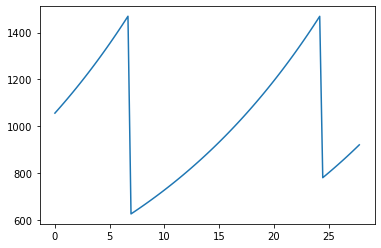

In [185]:
plt.plot(df.time,df.biomass)

In [219]:
df.biomass.reset_index(drop=True)

0      1056.180998
1      1070.832893
2      1085.688046
3      1100.749277
4      1116.019446
          ...     
96      871.291342
97      883.378345
98      895.633026
99      908.057709
100     920.654754
Name: biomass, Length: 101, dtype: float64

[0.0267, 0.1285, 0.131, 0.1144]

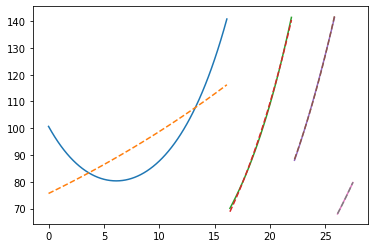

In [333]:
def get_growth_intervals(dataframe,cellID):
    df = dataframe[dataframe.id==cellID].reset_index(drop=True)
    biomass = df.biomass
    time = df.time
    pks = find_peaks(biomass)[0]
    intervals = list()
    for i in range(len(pks)+1):
        if i == 0:
            intervals.append([df.index[0],pks[0]+1])
        elif i < len(pks):
            intervals.append([pks[i-1]+1,pks[i]+1])
        else:
            intervals.append([pks[i-1]+1,df.index[-1]])
    def func(t,y0,mu):
        return y0*np.exp(t*mu)
    cell_type = df.type.unique()[0]
    mu = list()
    for interval in intervals:
        y0 = df.iloc[interval[0],3]
        t = np.linspace(df.iloc[interval[0],2],df.iloc[interval[1],2],1000)
        t_measured = df.iloc[interval[0]:interval[1],2]
        biomass_measured = df.iloc[interval[0]:interval[1],3]
        popt, pcov = curve_fit(func, t_measured, biomass_measured)
        plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[interval[0]:interval[1],3])
        plt.plot(t_measured,func(t_measured, *popt),ls='--')
        mu.append(round(popt[1],4))
    return mu
get_intervals(df,27)

In [290]:
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

# y= mu_max
def monod_func(y,t,params):
    """
    Monod function, ODE
    """
    cell_type=params['type'].value
    mu = params['mu_max'].value
    if cell_type == 1:
        return y* mu * (light/(K_m_light + light)) * (co2/( K_m_co2 + co2))
    elif cell_type ==2:
        return y* mu * (o2/(K_m_o2 + o2)) * (suc/( K_m_suc + suc))
def g(t,y0,params):
    """
    Solution to the ODE y'(t) = f(t,y,k) with initial condition y(0) = y0
    """
    y = odeint(monod_func, y0, t,args=(params,))
    return y
def residual(params, t, data):

    """
    compute the residual between actual data and fitted data
    """

    y0 = params['y0'].value
    model = g(t, y0, params)

    #y_model = model[:, 1]
    return (model[:,0] - data).ravel()

#plt.plot(t,sol,ls='--')

In [291]:
light = 1.00e-01 #kg/m^3
co2 = 4e-1
mu_max_cy = 0.06
K_m_light = 3.5e-04
K_m_co2 = 5e-2
K_m_suc = 3.6
K_m_o2 = 0.001
mu_max_ecw = 0.972
o2 = 0.009
suc = 0.1
df.type.unique()[0]

1

In [303]:
""" intervals = get_intervals(df)
cell_type = df.type.unique()[0]
for interval in intervals:
    print(interval)
    plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[interval[0]:interval[1],3])
for interval in intervals:
    print(interval)
    y0 = df.iloc[interval[0],3]
    t = np.linspace(df.iloc[interval[0],2],df.iloc[interval[1],2],1000)
    t_measured = df.iloc[interval[0]:interval[1],2]
    biomass_measured = df.iloc[interval[0]:interval[1],3]
    params = Parameters()
    if cell_type == 1:
        params.add('mu_max', value=mu_max_cy)
    elif cell_type ==2:
        params.add('mu_max', value=mu_max_ecw)
    params.add('y0',value = y0)
    params.add('type',value=cell_type)
    result = minimize(residual, params, args=(t_measured, biomass_measured), method='leastsq')
    data_fitted = g(t, y0, result.params)
    plt.plot(t, data_fitted[:, 0], '--', linewidth=2, color='red', label='fitted data')

    plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[interval[0]:interval[1],3])
    print(result.params['mu_max'].value) """

" intervals = get_intervals(df)\ncell_type = df.type.unique()[0]\nfor interval in intervals:\n    print(interval)\n    plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[interval[0]:interval[1],3])\nfor interval in intervals:\n    print(interval)\n    y0 = df.iloc[interval[0],3]\n    t = np.linspace(df.iloc[interval[0],2],df.iloc[interval[1],2],1000)\n    t_measured = df.iloc[interval[0]:interval[1],2]\n    biomass_measured = df.iloc[interval[0]:interval[1],3]\n    params = Parameters()\n    if cell_type == 1:\n        params.add('mu_max', value=mu_max_cy)\n    elif cell_type ==2:\n        params.add('mu_max', value=mu_max_ecw)\n    params.add('y0',value = y0)\n    params.add('type',value=cell_type)\n    result = minimize(residual, params, args=(t_measured, biomass_measured), method='leastsq')\n    data_fitted = g(t, y0, result.params)\n    plt.plot(t, data_fitted[:, 0], '--', linewidth=2, color='red', label='fitted data')\n\n    plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[int

In [304]:
#result.params['mu_max'].value

0.0559928484999795

0.033745779809818806 0.972
0.12760310036671313 0.972
0.11996171386192049 0.972


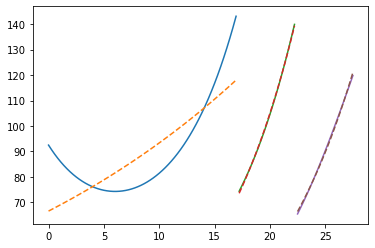

In [317]:
from scipy.optimize import curve_fit
def func(t,y0,mu):
    return y0*np.exp(t*mu)
cell_type = df.type.unique()[0]

for interval in intervals:
    #print(interval)
    if cell_type == 1:
        mu_max=mu_max_cy
    elif cell_type ==2:
        mu_max=mu_max_ecw
    y0 = df.iloc[interval[0],3]
    t = np.linspace(df.iloc[interval[0],2],df.iloc[interval[1],2],1000)
    t_measured = df.iloc[interval[0]:interval[1],2]
    biomass_measured = df.iloc[interval[0]:interval[1],3]
    popt, pcov = curve_fit(func, t_measured, biomass_measured)
    plt.plot(df.iloc[interval[0]:interval[1],2],df.iloc[interval[0]:interval[1],3])
    plt.plot(t_measured,func(t_measured, *popt),ls='--')
    print(popt[1],mu_max)

In [306]:
#[get_local_con(trajectory,'suc',t,1) for t in timepoints]

In [380]:
x= utils.get_data(id='c/47146695')
x.single_cell_growth()
df = x.single_cell_biomass


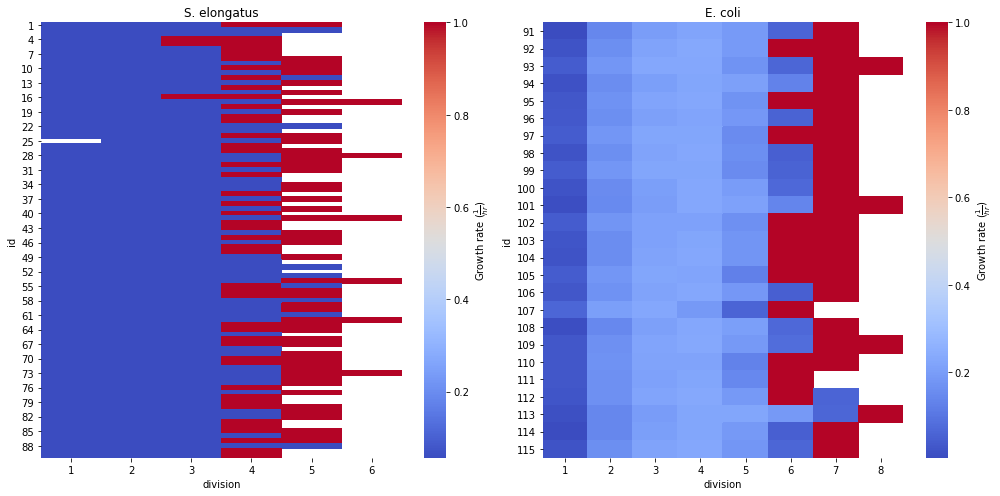

In [381]:
def func(t,y0,mu):
    return y0*np.exp(t*mu)
celltypes = df.type.unique()
celltypes.sort()
fig, axes = plt.subplots(ncols=2,figsize=(14,7))
for ct in celltypes:
    divs = pd.DataFrame(columns=['id','division','rate'])
    cells = df[df.type==ct].id.unique()
    cells.sort()
    for cell in cells:
        data = df[(df.id==cell) & (df.type==ct)].reset_index(drop=True)
        pks,_ = find_peaks(data.biomass)
        intervals = list()
        for i in range(len(pks)+1):
            if i == 0:
                intervals.append([data.index[0],pks[0]+1])
            elif i < len(pks):
                intervals.append([pks[i-1]+1,pks[i]+1])
            else:
                intervals.append([pks[i-1]+1,data.index[-1]])


        for i,interval in enumerate(intervals):
            y0 = data.iloc[interval[0],3]
            t = np.linspace(data.iloc[interval[0],2],data.iloc[interval[1],2],1000)
            t_measured = data.iloc[interval[0]:interval[1],2]
            biomass_measured = data.iloc[interval[0]:interval[1],3]
            if len(biomass_measured) > 4:
                popt, pcov = curve_fit(func, t_measured, biomass_measured)
                #print(round(popt[1],4))
                divs = divs.append(pd.DataFrame([[cell,i+1,round(popt[1],4)]],columns=['id','division','mu']),ignore_index=True)
                #plot cell id vs division rate over time
    piv = divs.pivot_table(index='id', columns='division', values='mu')
    g = sns.heatmap(piv, cmap='coolwarm',ax=axes[ct-1])
    cbar = g.collections[0].colorbar
    cbar.ax.set_ylabel(r'Growth rate ($\frac{1}{hr}$)')
    axes[0].set_title('S. elongatus')
    axes[1].set_title('E. coli')
    fig.tight_layout()


<AxesSubplot:xlabel='division', ylabel='mu'>

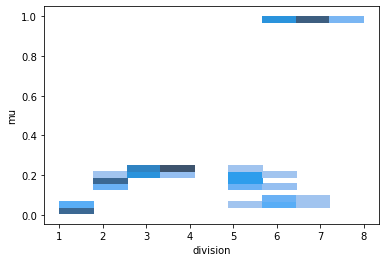

In [385]:
sns.histplot(x='division',y='mu',data=divs)

In [396]:
def growth_rate_mu(df, **kwargs):
    """
    Plot a heatmap of the single cell growth rates relative to each division

    Args:
        df (pandas.DataFrame):
            Pandas Dataframe containing biomass data

        **kwargs:
            Additional arguments to pass to plt.plot
    """
    def func(t,y0,mu):
        return y0*np.exp(t*mu)
    celltypes = df.type.unique()
    celltypes.sort()
    fig, axes = plt.subplots(ncols=2,figsize=(14,7))
    for ct in celltypes:
        divs = pd.DataFrame(columns=['id','division','rate'])
        cells = df[df.type==ct].id.unique()
        cells.sort()
        for cell in cells:
            data = df[(df.id==cell) & (df.type==ct)].reset_index(drop=True)
            pks,_ = find_peaks(data.biomass)
            intervals = list()
            for i in range(len(pks)+1):
                if i == 0:
                    intervals.append([data.index[0],pks[0]+1])
                elif i < len(pks):
                    intervals.append([pks[i-1]+1,pks[i]+1])
                else:
                    intervals.append([pks[i-1]+1,data.index[-1]])


            for i,interval in enumerate(intervals):
                y0 = data.iloc[interval[0],3]
                t = np.linspace(data.iloc[interval[0],2],data.iloc[interval[1],2],1000)
                t_measured = data.iloc[interval[0]:interval[1],2]
                biomass_measured = data.iloc[interval[0]:interval[1],3]
                if len(biomass_measured) > 4:
                    popt, pcov = curve_fit(func, t_measured, biomass_measured)
                    #print(round(popt[1],4))
                    divs = divs.append(pd.DataFrame([[cell,i+1,round(popt[1],4)]],columns=['id','division','mu']),ignore_index=True)
                    #plot cell id vs division rate over time

        #plot cell id vs division rate over time
        piv = divs.pivot_table(index='id', columns='division', values='mu')
        g = sns.heatmap(piv, cmap='coolwarm',ax=axes[ct-1])
        cbar = g.collections[0].colorbar
        cbar.ax.set_ylabel(r'Growth rate ($\frac{1}{hr}$)')
    axes[0].set_title('S. elongatus')
    axes[1].set_title('E. coli')
    fig.tight_layout()
    return fig

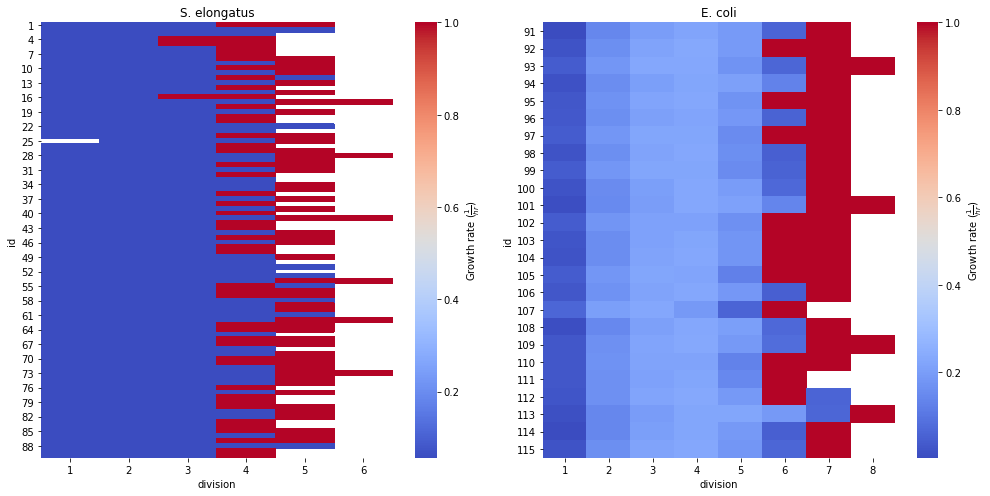

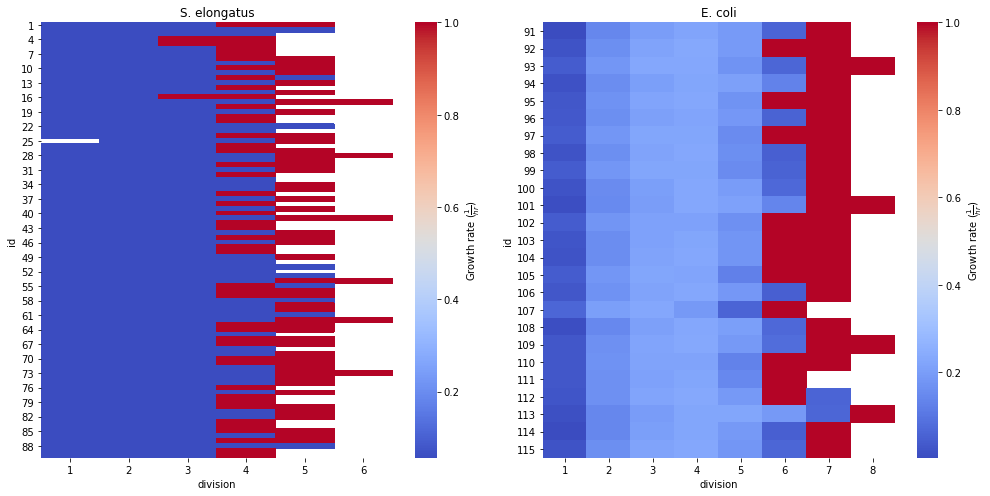

In [397]:

df = x.single_cell_biomass
growth_rate_mu(df)

,id,type,time,biomass
98,44,2,27.222222,73.170857
99,44,2,27.500000,75.482675


SyntaxError: unexpected EOF while parsing (<ipython-input-394-6ac022077566>, line 1)